In [70]:
#image analysis
import sys
import os
sys.path.append(os.path.abspath('../../'))

#image analysis
import skimage.io
import imageio
import alienlab.plot
from alienlab.improcessing import normalize, grey_to_rgb, make_binary

from alienlab.fo import FramesOperator
import alienlab.io
from scipy import optimize
import glob
from alienlab.regression_func import *
import copy
from VoltageIntensityClass import VoltageIntensity
from tqdm import tqdm

from joblib.externals.loky import set_loky_pickler
from joblib import parallel_backend
from joblib import Parallel, delayed
from joblib import wrap_non_picklable_objects
from skimage.transform import resize

def get_fit(decay, time, give_y = False):    

    time_spread = time.max()-time.min()
    start = np.mean(decay[0])
    stop = np.mean(decay[-5:])
    if len(decay)<15:
        x0 = [start, time_spread/10, stop]
    else:
        x0 = [start, time_spread, stop]

    parameters_estimated = optimize.least_squares(residuals,  x0, bounds = (-1e8,1e8),
                                args = (time, decay, exp_decay))
    
    if give_y:
        return np.array(parameters_estimated.x), exp_decay(parameters_estimated.x, time)
    else:
        return np.array(parameters_estimated.x)

def make_fit(decay, time_array):
    plt.figure()
    params, ypred = get_fit(decay, time_array, give_y = True)
    plt.plot(time_array, ypred, label = params[1])
    plt.plot(time_array, decay, '.')
    plt.xlabel("time(s)")
    plt.ylabel("fluorescence")
    plt.legend()
    



In [77]:


from PIL import Image

import scipy

import tifffile as tiff

#interactive widget packages
from ipywidgets import interact, interactive, fixed, interact_manual
from tkinter.filedialog import askopenfilename, askdirectory

from VoltageIntensityClass import VoltageIntensity


import time
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg  # Using the ipython notebook widgets
from alienlab.regression_func import platt, residuals
from alienlab.utils import clip
from alienlab.segment import uniform_mask, label_to_data
from alienlab.widget import click_to_graph
#%matplotlib inline


from mvgavg import mvgavg

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D
from csbdeep.utils import Path, normalize
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
model = StarDist2D.from_pretrained('2D_demo')

Found model '2D_demo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.486166, nms_thresh=0.5.


In [ ]:

def get_fit(decay, time, give_y = False): 
    
    time = time - time[0]

    time_spread = time.max()-time.min()
    start = np.mean(decay[0])
    stop = np.mean(decay[-5:])
    #if len(decay)<15:
    #    x0 = [start, time_spread/10, stop]
    #else:
    x0 = [start, time_spread, stop]

    parameters_estimated = optimize.least_squares(residuals,  x0, bounds = (-1e8,1e8),
                                args = (time, decay, exp_decay))
    
    if give_y:
        return np.array(parameters_estimated.x), exp_decay(parameters_estimated.x, time)
    else:
        return np.array(parameters_estimated.x)
    
def make_fit(decay, time_array):
    plt.figure()
    params, ypred = get_fit(decay, time_array, give_y = True)
    plt.plot(time_array, ypred, label = params[1])
    plt.plot(time_array, decay, '.')
    plt.xlabel("time(s)")
    plt.ylabel("fluorescence")
    plt.legend()
    
    

In [72]:
#file_path = "ENTER NAME OF THE FILE YOU DROPPED IN THE FILE SECTION HERE" 
file_folder = '.'#askdirectory(title = 'Select an experiment folder', initialdir="G:/DREAM/from_github/PAMFluo/Experiments")  # pops up a window to select your file 
# uncomment this line if you use this jupyter notebook locally
#'G:/DREAM/from_github/PAMFluo/Experiments/2021-06-24_12_12_Ek_video'
file_folder

'.'

# Autofocus

In [73]:
file_max = glob.glob(file_folder + "/*autofocus*/*autofocus.png*")
Image.open(file_max[0])
file_max = glob.glob(file_folder + "/*autofocus*/*image_focus.png*")
"""
im = np.array(Image.open(file_max[0]))
plt.figure()
plt.imshow(im)
"""

2343627534.py (2): unclosed file <_io.BufferedReader name='.\\2021-11-26_00_56_autofocus\\2021-11-26_01_00_autofocus.png'>


'\nim = np.array(Image.open(file_max[0]))\nplt.figure()\nplt.imshow(im)\n'

# Fitness

G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
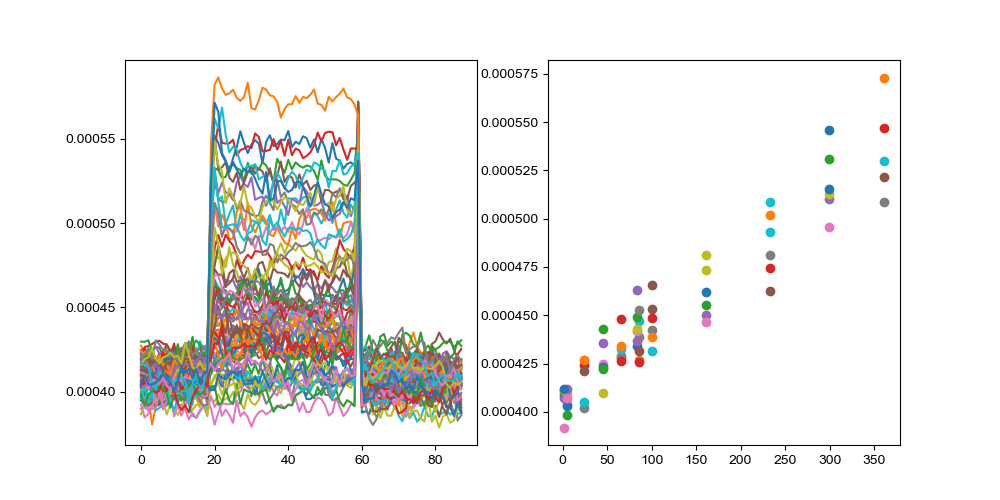

In [75]:
data = {}
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

V = VoltageIntensity()

NN = 6

filter_list = np.array([2]*NN + [1]*NN)#[::-1]
limits_blue = np.array(list(np.linspace(0, 450, NN))+list(np.linspace(0, 450, NN)))#[::-1]

for i, exp in enumerate(glob.glob(file_folder+"/*IBPC_pulse*/")[:-1]):
    if i==i:
        file = glob.glob(exp+ "/*IBPC_pulse.csv*")

        df = pd.read_csv(file[0])
        data[i] = df
        FD_curve = df['voltage blank_mean']
        FD = np.mean(FD_curve[40:55])
        intensity = V.get_intensity_voltage('blue', filter_list[i%(2*NN)], limits_blue[i%(2*NN)]/100)*1e6
        I_curve = df['voltage intensity_mean']
        I = np.mean(I_curve[40:55])

        axs[0].plot(FD_curve)
        #axs[1].plot(I_curve)
        axs[1].plot(intensity, FD, 'o')

G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
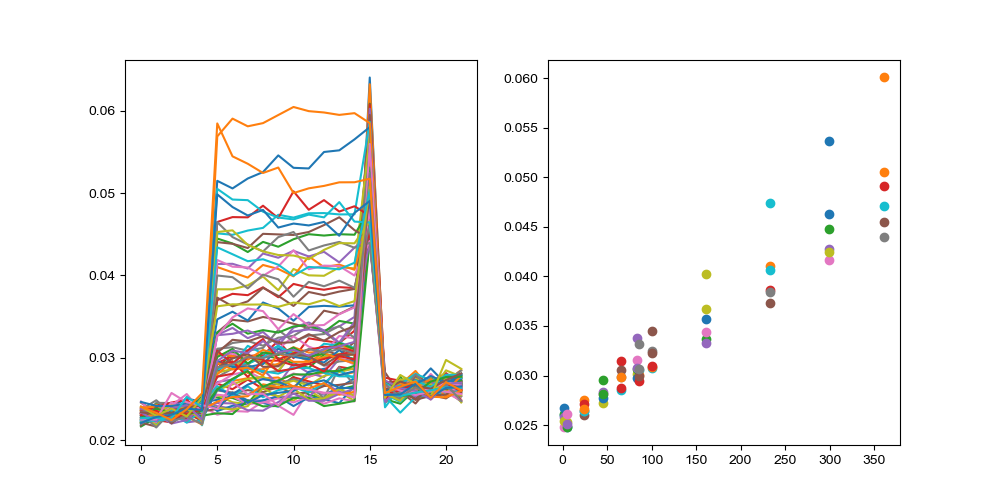

In [76]:
data = {}
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

V = VoltageIntensity()

NN = 6

filter_list = np.array([2]*NN + [1]*NN)#[::-1]
limits_blue = np.array(list(np.linspace(0, 450, NN))+list(np.linspace(0, 450, NN)))#[::-1]

for i, exp in enumerate(glob.glob(file_folder+"/*IBPC_pulse*/")):
    if i==i:
        file = glob.glob(exp+ "/*video.tiff*")

        video = tiff.imread(file)
        v_high = np.mean(video, axis = (1,2))
        intensity = V.get_intensity_voltage('blue', filter_list[i%(2*NN)], limits_blue[i%(2*NN)]/100)*1e6


        axs[0].plot(v_high)
        #axs[1].plot(I_curve)
        axs[1].plot(intensity, np.mean(v_high[10:13]), 'o')

In [ ]:
ind_algae = 3
flat_mask = labels.flatten()
start = 191#941#159#191
stop =  941#len(v_high)#190#941

col = 5
fig, axs = plt.subplots(col, 3, figsize=(12,12))

for j in range(1, 11):
    for i, f in enumerate(glob.glob(file_folder + "/*qE_calib*")):
            threshold = 0.08#np.max(v_high)*0.6

            ind_range = list(range(start, stop))
            trace = v_high[ind_range]
            ind = trace > threshold
            nind = trace <= threshold
            nind[0]=0
            nind[-1]=0
            nind = ind

            file_path = f + "/video_timing.npy"
            v_time_high = np.load(file_path)
            if i==i:
                t0 = v_time_high[0]
            v_time_high = v_time_high - t0
            v_time_high = v_time_high%(3600*24)



            print( glob.glob(f))
            file_path = glob.glob(f + "/*video.tiff")[0] # pops up a window to select your file
            video = tiff.imread(file_path)
            video = video[start:stop][nind]
            video = video.reshape(video.shape[0], -1)
            pos = flat_mask == j

            y = np.mean(video[:, pos], axis = 1)    
            x = v_time_high[start:stop][nind]
            params, ypred = get_fit(y, x, give_y = True)
            #plt.plot(x, ypred, label = params[1])
            #plt.plot(x, y, '.')
            #plt.title("zone %d"%(i+3))
            #plt.legend()
            if params[1]<500:
                axs[(j+1)%col][(j+1)//col].scatter(i, params[1])
                axs[(j+1)%col][(j+1)//col].set_title("algae %d"%(j))


# NPQ

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

#voltage = [3, 10, 30, 100, 150, 200, 250, 300, 350, 400, 3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

NN = 20
filter_list = np.array([0.5]*NN + [0]*NN)#[::-1]
voltage =  [50, 90, 100, 110, 120, 140, 160, 180, 200, 215, 235, 255, 280, 300]
voltage = [0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300]
np.array(list(np.linspace(0, 450, NN))+list(np.linspace(0, 450, NN)))#[::-1]

W = 100

for i, f in enumerate(glob.glob(file_folder + "/*qE_calib*")):
    #if i not in [0]:
        print( glob.glob(f))
        file_path = glob.glob(f + "/*_output_plot.csv")[0] # pops up a window to select your file
        data_sequence = pd.read_csv(file_path)

        time_array = np.array(data_sequence["time (s) intensity"])
        fluo  = np.array(data_sequence["voltage (V) fluorescence"])
        fluo = fluo - np.mean(fluo[400:450])
        amplitude = np.array(data_sequence["voltage (V) intensity"])
        
        V = VoltageIntensity()#folder = "G:/DREAM/from_github/PAMFluo/Experiments/2021-10-18_10_19_bode_diagram")
        intensity = V.get_intensity_voltage('blue', filter_list[i], voltage[i]/100)*1e6
        #fluo = amplitude
        
        x = mvgavg(time_array, W)
        y = mvgavg(fluo, W)#/FM

        mrange = (x>11.4)*(x<11.6)
        FM = np.mean(y[mrange])
        xrange = (x>10)*(x<20)
        axs[0][0].plot(x[xrange], y[xrange]/FM, label = voltage[i])
        axs[0][0].legend()
        qrange = (x>33)*(x<35)
        FQ = np.mean(y[qrange])
        axs[1][0].scatter(intensity, (FM-FQ)/FQ, color = 'k')
        
        axs[0][1].legend()
        
        x = mvgavg(time_array, W)
        xlow = (x>18)*(x<20)
        xhigh = (x>165)*(x<175)
        FP = np.mean(y[xlow])
        FB =  np.mean(y[xhigh])
        xrange = (x>50)*(x<180)*(y<1.3)
        axs[0][1].plot(x[xrange], y[xrange]/FP, label = intensity)
        axs[1][1].scatter(intensity, (FB-FP)/FB)
        axs[0][2].plot(mvgavg(time_array, W), y, label = file_path[-30:-8])
        #axs[1][1].plot(x[xlow], y[xlow])
        axs[0][2].legend()

        axs[1][2].scatter(i, FQ, label = file_path[-30:-8])


        #axs[3].scatter(voltage[i], FQ, color = 'r')
plt.legend()


['.\\2021-11-25_19_36_qE_calib']
G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['.\\2021-11-25_20_13_qE_calib']
G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram
['.\\2021-11-25_20_49_qE_calib']
G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram
['.\\2021-11-25_21_26_qE_calib']
G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram
['.\\2021-11-25_22_30_qE_calib']
G:/DREAM/from_github/PAMFluo/Experiments\2021-11-23_10_46_bode_diagram
['.\\2021-11-25_23_06_qE_calib']


['.\\2021-11-25_19_36_qE_calib']
['.\\2021-11-25_20_13_qE_calib']
['.\\2021-11-25_20_49_qE_calib']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
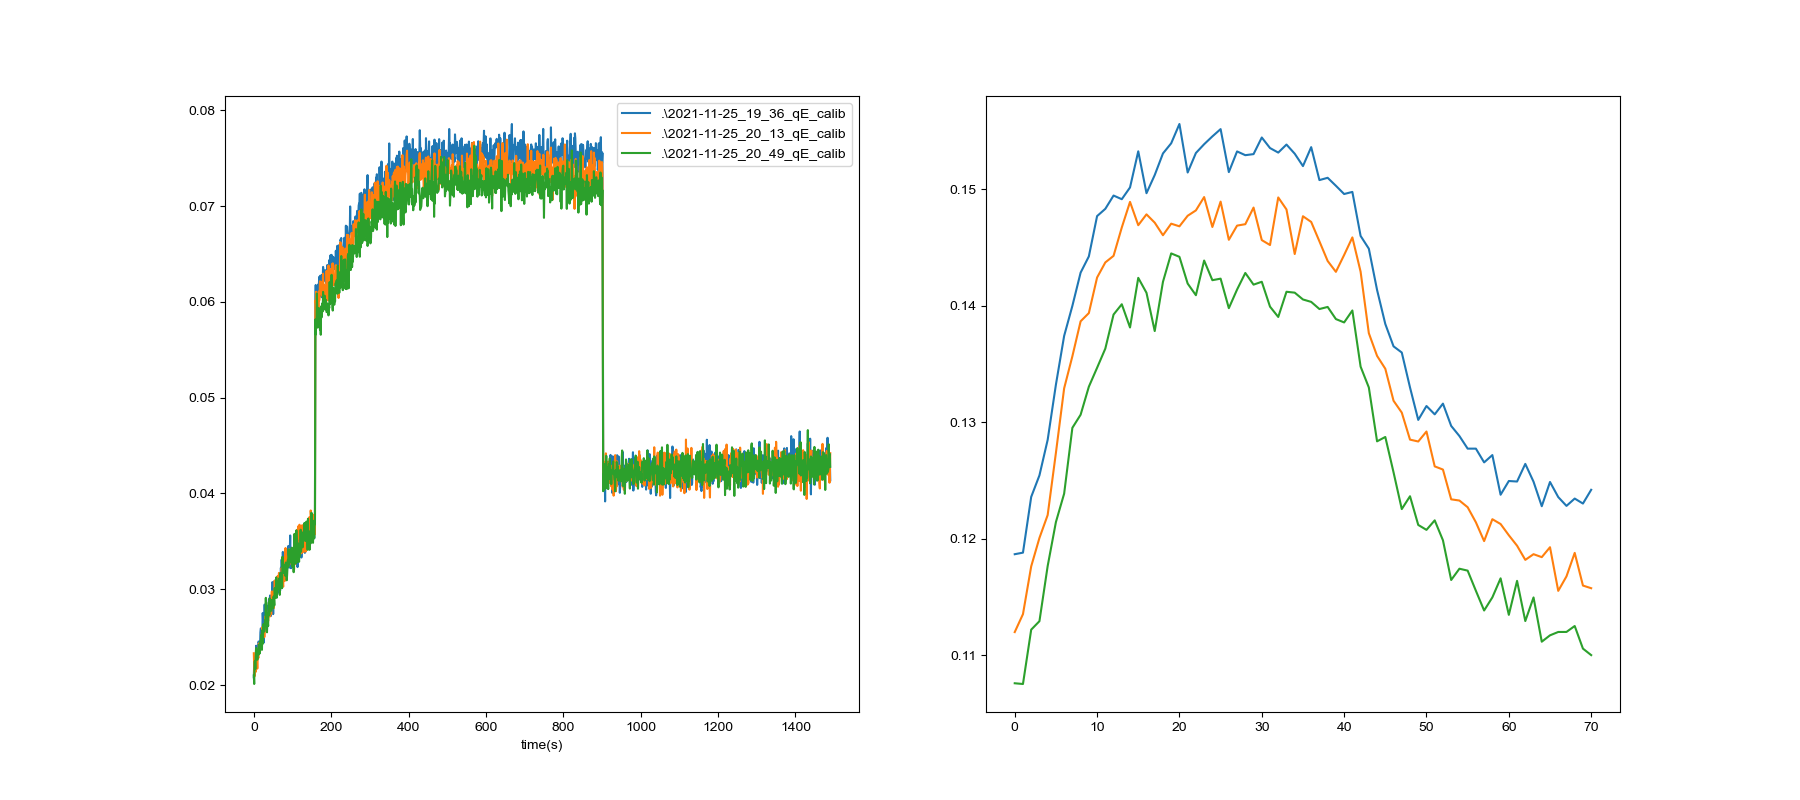

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

#voltage = [3, 10, 30, 100, 150, 200, 250, 300, 350, 400, 3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

NN = 20
filter_list = np.array([0.5]*NN + [0]*NN)#[::-1]
voltage =  [50, 90, 100, 110, 120, 140, 160, 180, 200, 215, 235, 255, 280, 300]
voltage = [0, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300]
np.array(list(np.linspace(0, 450, NN))+list(np.linspace(0, 450, NN)))#[::-1]

W = 100

for i, f in enumerate(glob.glob(file_folder + "/*qE_calib*")[:3]):

        print( glob.glob(f))
        file_path = glob.glob(f + "/*video.tiff")[0] # pops up a window to select your file
        video = tiff.imread(file_path)
        v_high = np.mean(video, axis = (1,2))
        threshold = 0.08#np.max(v_high)*0.6

        axs[0].plot(v_high[v_high <threshold], label = f)
        axs[0].set_xlabel("time(s)")
        axs[0].legend()
        axs[1].plot(v_high[v_high >threshold])

In [7]:
show = True #option to output intermediary images in the segmentation process
# Initialize plotting tools
g = alienlab.plot.ShowFigure()
g.figsize = (15,7)
g.save_folder = "images"
g.date = False
p = alienlab.plot.PlotFigure()
p.figsize = (15,7)
p.save_folder = "images"
p.date = False

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.38it/s]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
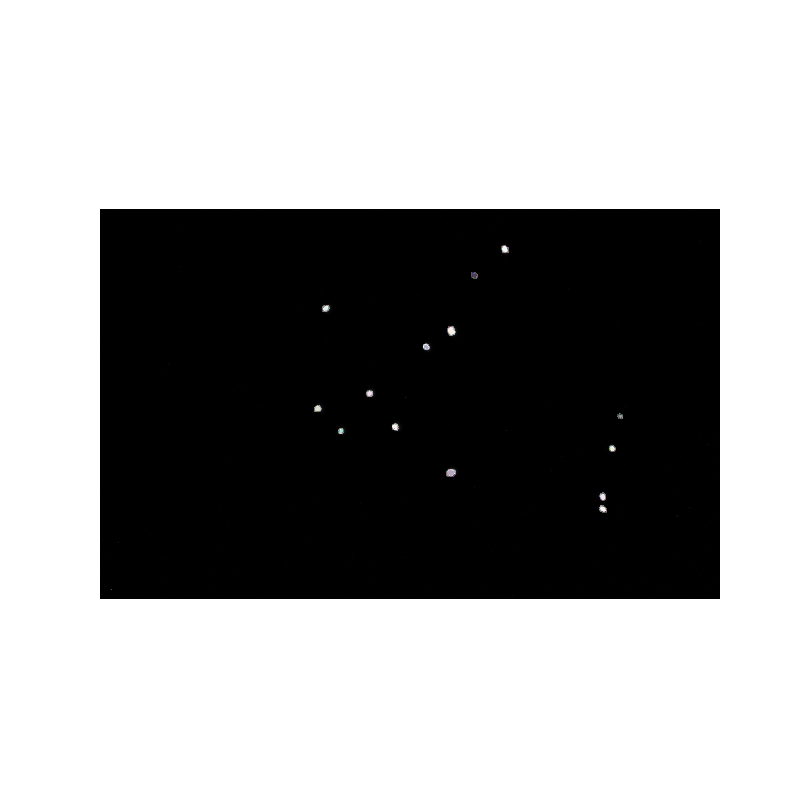

In [16]:
axis_norm = (0,1)   # normalize channels independently
lbl_cmap = random_label_cmap()
img = normalize(np.mean(video[150:600], axis = 0), 1,99.9, axis=axis_norm)
labels, details = model.predict_instances(img)


plt.figure(figsize=(8,8))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

items_dict = label_to_data(labels, FO)


In [12]:
# read the stacked frame. dim = NxHxW (N images in the video, Heigt, Width)
show = True
file_path = glob.glob(f + "/*video.tiff*")[0]

frames_full = skimage.io.imread(file_path)

#frames_full = np.stack([frames_full[:,:,1]]*10, 0) 
#uncomment this line if you have a single RGB image. The [:,:,1] stands for selection of the green channel

FO = FramesOperator(frames_full)
im = normalize(FO.frames[0], 0, 1)
im = grey_to_rgb(im)*255

# CROP
#y, x = alienlab.io.select_roi(np.uint8(im)) #select area of interest

FO.x = 100, 300
FO.y = 200, 500
#FO.crop() #crop image

start_time = time.time()
#FO.compute_stats() #compute various statistical values on the frames and the pixels
#FO.normalize(0, 1)
print("--- Computed frames statistics in %04f seconds ---" % (time.time() - start_time))

#FO.global_stats: each array has size N, number of frames and represents the stats of each frame
#FO.frames_stats: each array has size FO.x, FO.y and is an image representing the N frames stats overlayed

#if show:
#    p.title = 'statistics'
#    p.xlabel = 'frame number'
#    p.ylabel = 'amplitude'
#    p.label_list = ['max', 'min', 'mean', 'std']
#    fig = p.plotting(np.asarray(FO.inds), [FO.global_stats['mean'], 
#                        FO.global_stats['min'], 
#                        FO.global_stats['mean']])
#   p.save_name = 'frames_stats'
#    p.saving(fig)

''' IMAGE SEGMENTATION '''

# selection of the frames with high dynamics that will be used for the image segmentation process.
# Let M be the highest value taken by a pixel in all the frames of the video. The frame F is kept for processing only if at
# least one pixel in the frame F has a value above 0.8*M. 


--- Computed frames statistics in 0.000000 seconds ---


plt.figure()
fluo  = np.array(data_sequence["voltage (V) intensity"])
fluo2  = np.array(data_sequence["voltage (V) arduino_blue"])
fluo3  = np.array(data_sequence["voltage (V) arduino_purple"])

plt.plot(fluo)
plt.plot(fluo2)
plt.plot(fluo3)

0
1
2
3
4
5
6
7


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
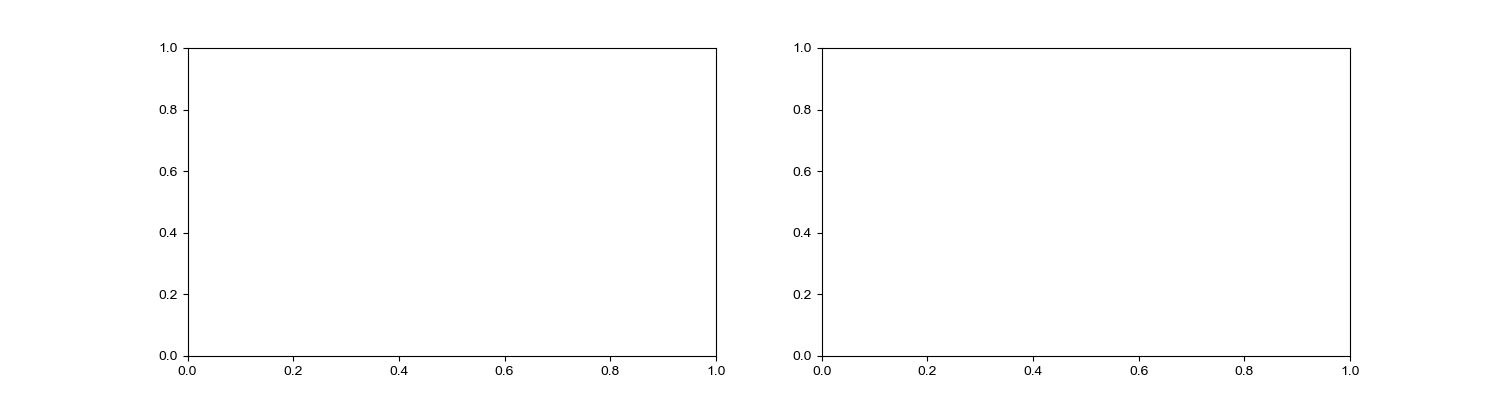

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
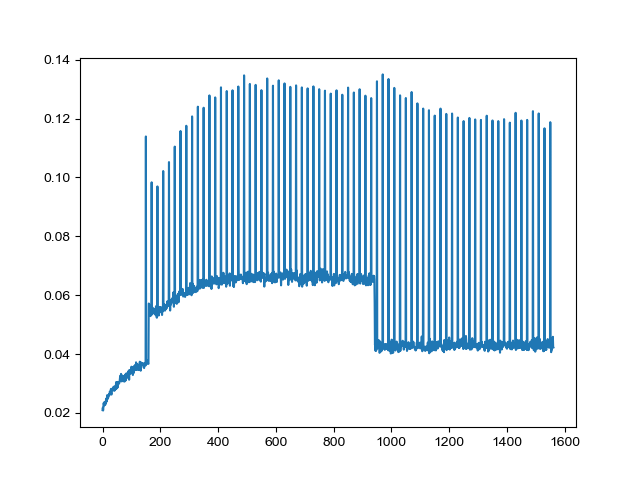

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
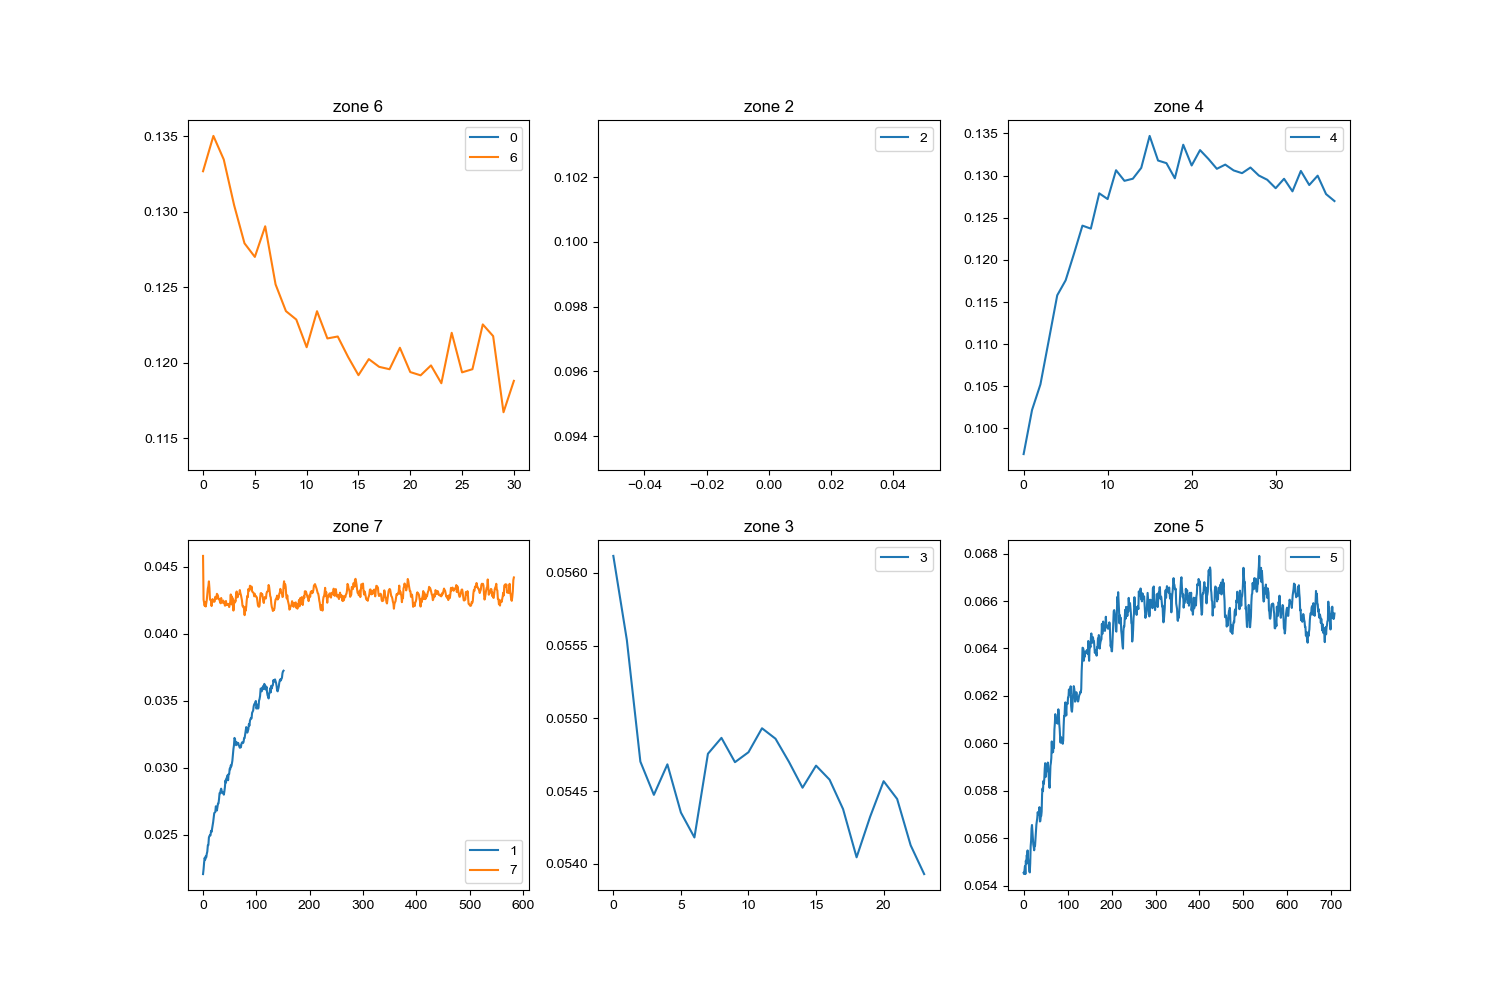

In [41]:
data_sequence = {}
video_sequence = {}
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

file_path = glob.glob(f + "/*_output_plot.csv")[0] # pops up a window to select your file
data_sequence = pd.read_csv(file_path)

time_array = np.array(data_sequence["time (s) intensity"])
fluo  = np.array(data_sequence["voltage (V) fluorescence"])
amplitude = np.array(data_sequence["voltage (V) intensity"])

##axs[0].plot(time_array, fluo)
#axs[0].set_title("MPPC high, voltage")

start = 0
#axs[1].plot(mvgavg(time_array, 100)[start:], (mvgavg(fluo, 100))[start:])
#axs[1].set_title("MPPC high, voltage")

#plt.savefig(f + "/MPPC.pdf")

file_path = f + "/video.tiff"
video = tiff.imread(file_path)
video_sequence[0]=video
v_high = np.mean(video, axis = (1,2))
file_path = f + "/video_timing.npy"
v_time_high = np.load(file_path)
t0 = v_time_high[0]
v_time_high = v_time_high -t0
v_time_high = v_time_high%(3600*24)


file_path = f + "/video.tiff"
video_file_high = tiff.imread(file_path)


fig = plt.figure()
plt.plot(v_high)
plt.savefig(f + "/video_total.pdf")


zone = []
time_zone = []
video_zone = []

indices_clean = 0, 159, 190, 941, len(v_high)# 431, 911, 927, 1331, 1811, 1827, 2231, len(v_high)        
THRESHOLD = 0.08
N_mvg = 5


for i in range(len(indices_clean)-1):
        ind_range = list(range(indices_clean[i],indices_clean[i+1]))
        trace = v_high[ind_range]
        ind = trace > THRESHOLD
        nind = trace <= THRESHOLD
        nind[0]=0
        nind[-1]=0
        zone.append(trace[ind])
        zone.append(mvgavg(trace[nind], N_mvg))
        
        v_time = v_time_high[ind_range]
        time_zone.append(v_time[ind])
        time_zone.append(mvgavg(v_time[nind], N_mvg))
        
        vid = video_file_high[ind_range]
        video_zone.append(vid[ind])
        video_zone.append(mvgavg(vid[nind], N_mvg))

   
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#time_zone[2] = np.append(time_zone[3][0], time_zone[2])
#zone[2] = np.append(zone[0][0], zone[2])
#video_zone[2] = np.concatenate([video_zone[0], video_zone[2]])


for k in range(len(zone)):
        print(k)
        axs[k%2][(k//2)%3].plot(zone[k], label = k)
        axs[k%2][(k//2)%3].set_title("zone %d"%k)
        axs[k%2][(k//2)%3].legend()
plt.savefig(f + "/phase_graph.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
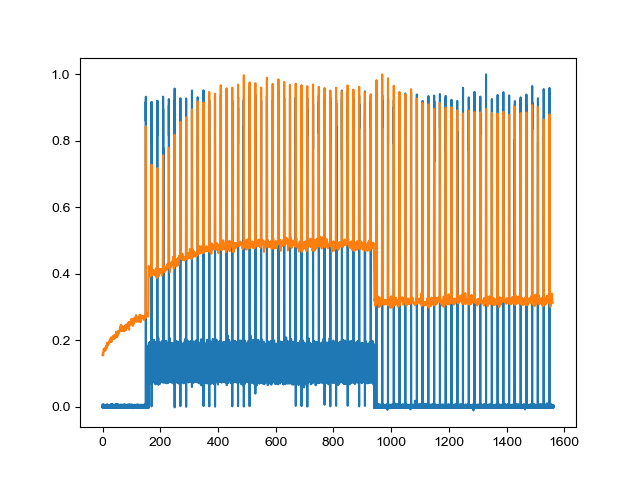

In [42]:
plt.figure()
plt.plot(time_array, amplitude/amplitude.max())
plt.plot(v_time_high, v_high/v_high.max())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
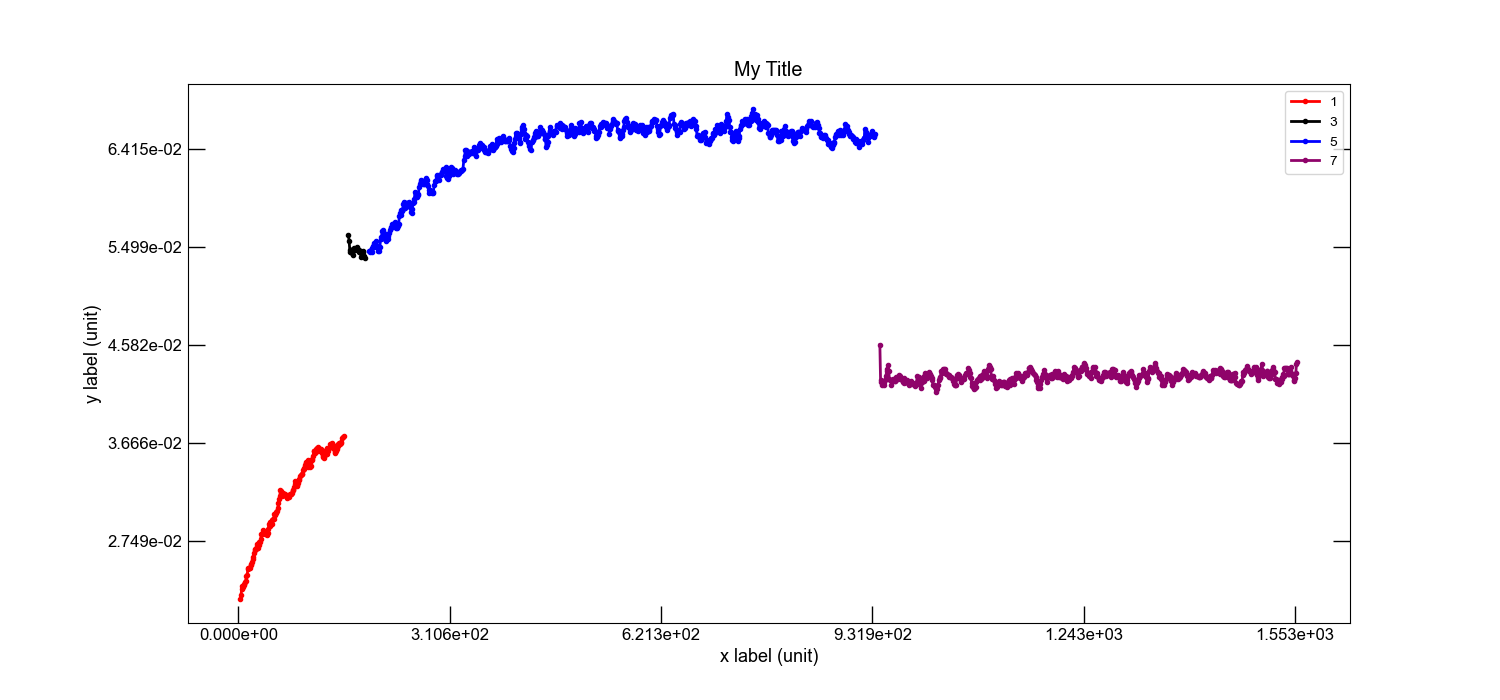

In [54]:
p.yval = zone[1::2]
p.xval = time_zone[1::2]
p.label_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"][1::2]
k = p.plotting(p.xval, p.yval)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
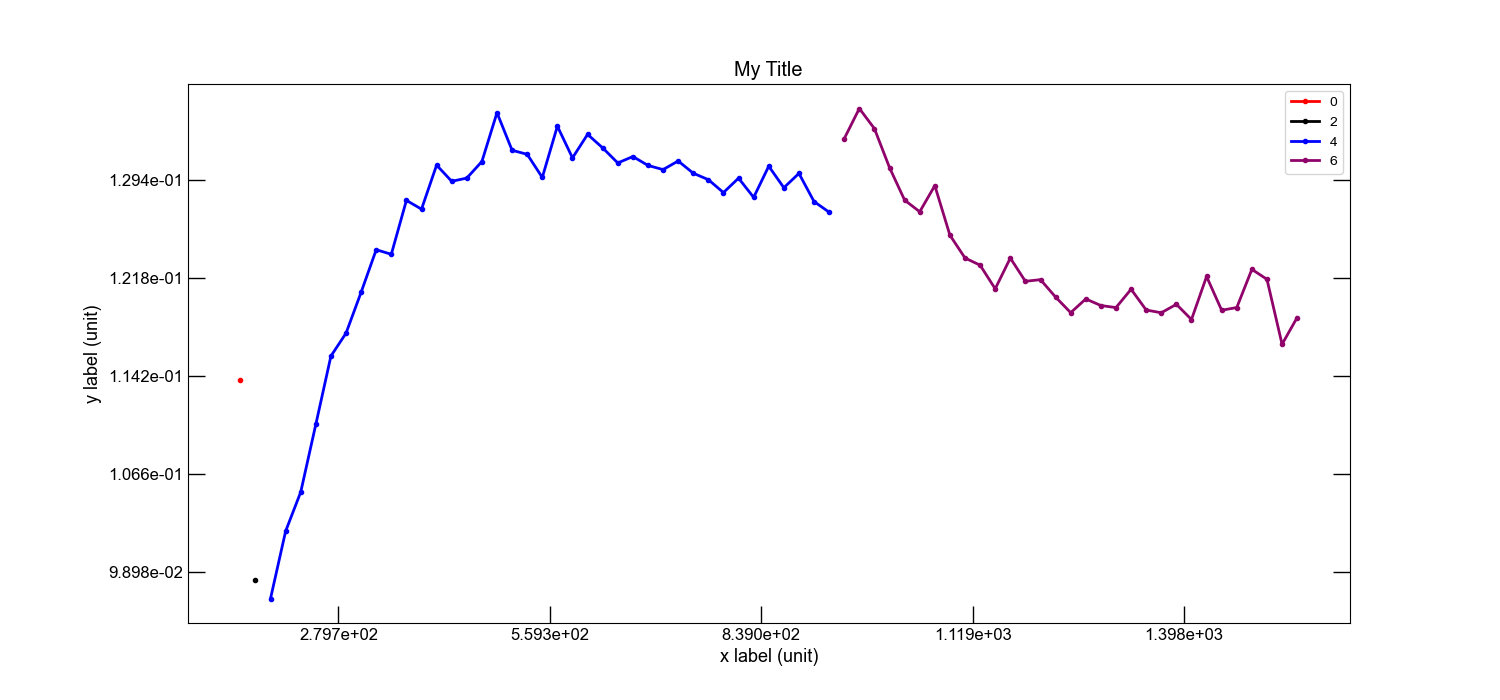

In [53]:
p.yval = zone[0::2]
p.xval = time_zone[0::2]
p.label_list = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"][0::2]
k = p.plotting(p.xval, p.yval)

Text(0, 0.5, 'fluorescence intensity')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
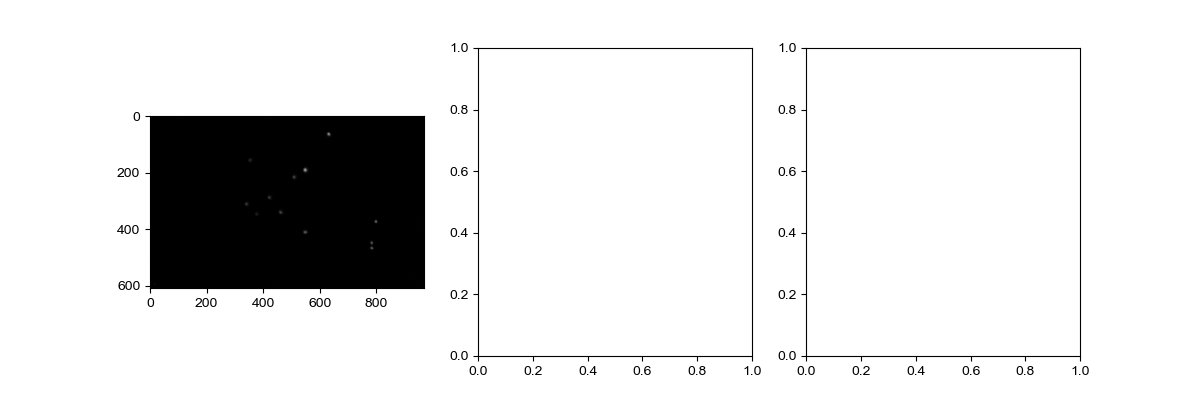

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
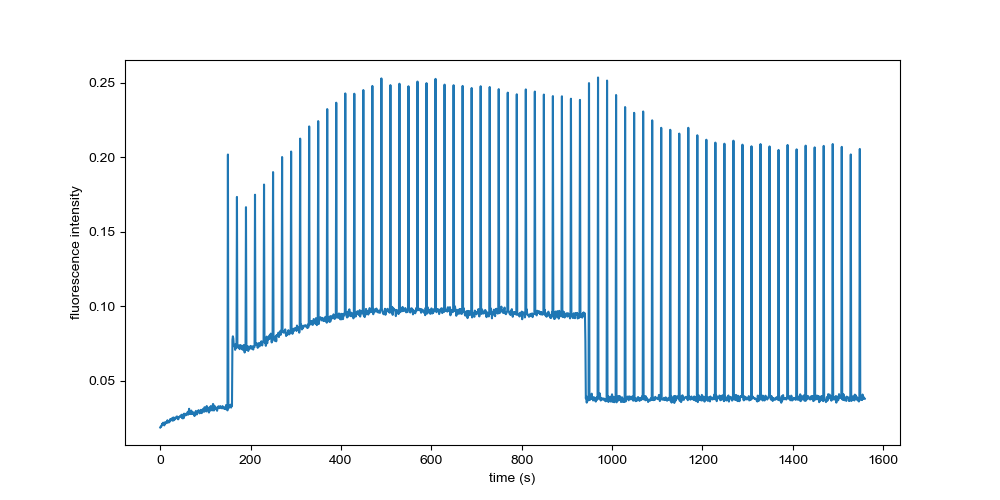

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
#x0, x1, y0, y1 = 100, 500, 300, 700
#x0, x1, y0, y1 = 10, 800, 30, 1000
axs[0].imshow(np.mean(video_sequence[0], axis = 0), cmap = "gray")#[2, x0:x1, y0:y1], vmin = 0, vmax = 30)

plt.figure(figsize = (10, 5))
plt.plot(v_time_high, np.mean(video_sequence[0][:, 100:500, 300:700], axis = (1,2)))
plt.xlabel("time (s)")
plt.ylabel("fluorescence intensity")

In [46]:

video_high = []

file_path = f + "/video.tiff"
video_file_high = tiff.imread(file_path)


algae_list = list(items_dict.keys())
for P in [5]:#[len(algae_list)]:#[8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 60, 90, 120, 180, 200, 250, 300, 400, 500, 600, 700]:

    #for algae in random.sample(algae_list, P):
    for algae in tqdm(algae_list):
        #if int(algae):# in ['1', '80', '400', '250']:
            i = 0


            x_coords =  items_dict[algae]['x_coords']
            y_coords =  items_dict[algae]['y_coords']
            
            trace = np.mean(video_file_high[:, x_coords, y_coords], axis = (1))
            video_high.append(np.array(trace))

video_high = np.array(video_high)


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  6.52it/s]


In [20]:

flat_mask = labels.flatten()


L = len(video_zone) + 1
col = 2
fig, axs = plt.subplots(col, 3, figsize=(12,12))

video_list_init = video_zone
time_list = time_zone
video_list = []
for video in video_list_init:
    if video.shape[0]!=0:
        video_list.append(video)

for i, video in enumerate(video_list): 
    video_list[i] = video.reshape(video.shape[0], -1)



for ind in [3]:
    if ind != 0:
        pos = flat_mask == ind
        for i, video in enumerate(video_list[3:7]):
            if len(time_zone[i+2])>0:
                y = np.mean(video[:, pos], axis = 1)    
                x = time_zone[i+3]
                params, ypred = get_fit(y, x, give_y = True)
                axs[(i+1)%col][(i+1)//col].plot(x, ypred, label = params[1])
                axs[(i+1)%col][(i+1)//col].plot(x, y, '.')
                axs[(i+1)%col][(i+1)//col].set_title("zone %d"%(i+3))
                axs[(i+1)%col][(i+1)//col].legend()

plt.savefig(f + "/example_algae.pdf")

NameError: name 'video_zone' is not defined

In [57]:
t0

2230627.001714

['.\\2021-11-25_19_36_qE_calib']
['.\\2021-11-25_20_13_qE_calib']
['.\\2021-11-25_20_49_qE_calib']
['.\\2021-11-25_21_26_qE_calib']
['.\\2021-11-25_22_30_qE_calib']
['.\\2021-11-25_23_06_qE_calib']
['.\\2021-11-26_00_20_qE_calib']
['.\\2021-11-26_01_25_qE_calib']
['.\\2021-11-26_02_02_qE_calib']
['.\\2021-11-26_02_39_qE_calib']
['.\\2021-11-26_03_15_qE_calib']
['.\\2021-11-26_04_19_qE_calib']
['.\\2021-11-26_04_55_qE_calib']
['.\\2021-11-26_05_32_qE_calib']
['.\\2021-11-26_06_08_qE_calib']
['.\\2021-11-26_07_12_qE_calib']
['.\\2021-11-26_07_49_qE_calib']
['.\\2021-11-26_08_25_qE_calib']
['.\\2021-11-26_09_02_qE_calib']
['.\\2021-11-26_10_05_qE_calib']
['.\\2021-11-26_10_42_qE_calib']
['.\\2021-11-26_11_19_qE_calib']
['.\\2021-11-25_19_36_qE_calib']
['.\\2021-11-25_20_13_qE_calib']
['.\\2021-11-25_20_49_qE_calib']
['.\\2021-11-25_21_26_qE_calib']
['.\\2021-11-25_22_30_qE_calib']
['.\\2021-11-25_23_06_qE_calib']
['.\\2021-11-26_00_20_qE_calib']
['.\\2021-11-26_01_25_qE_calib']
['.\\2021-

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
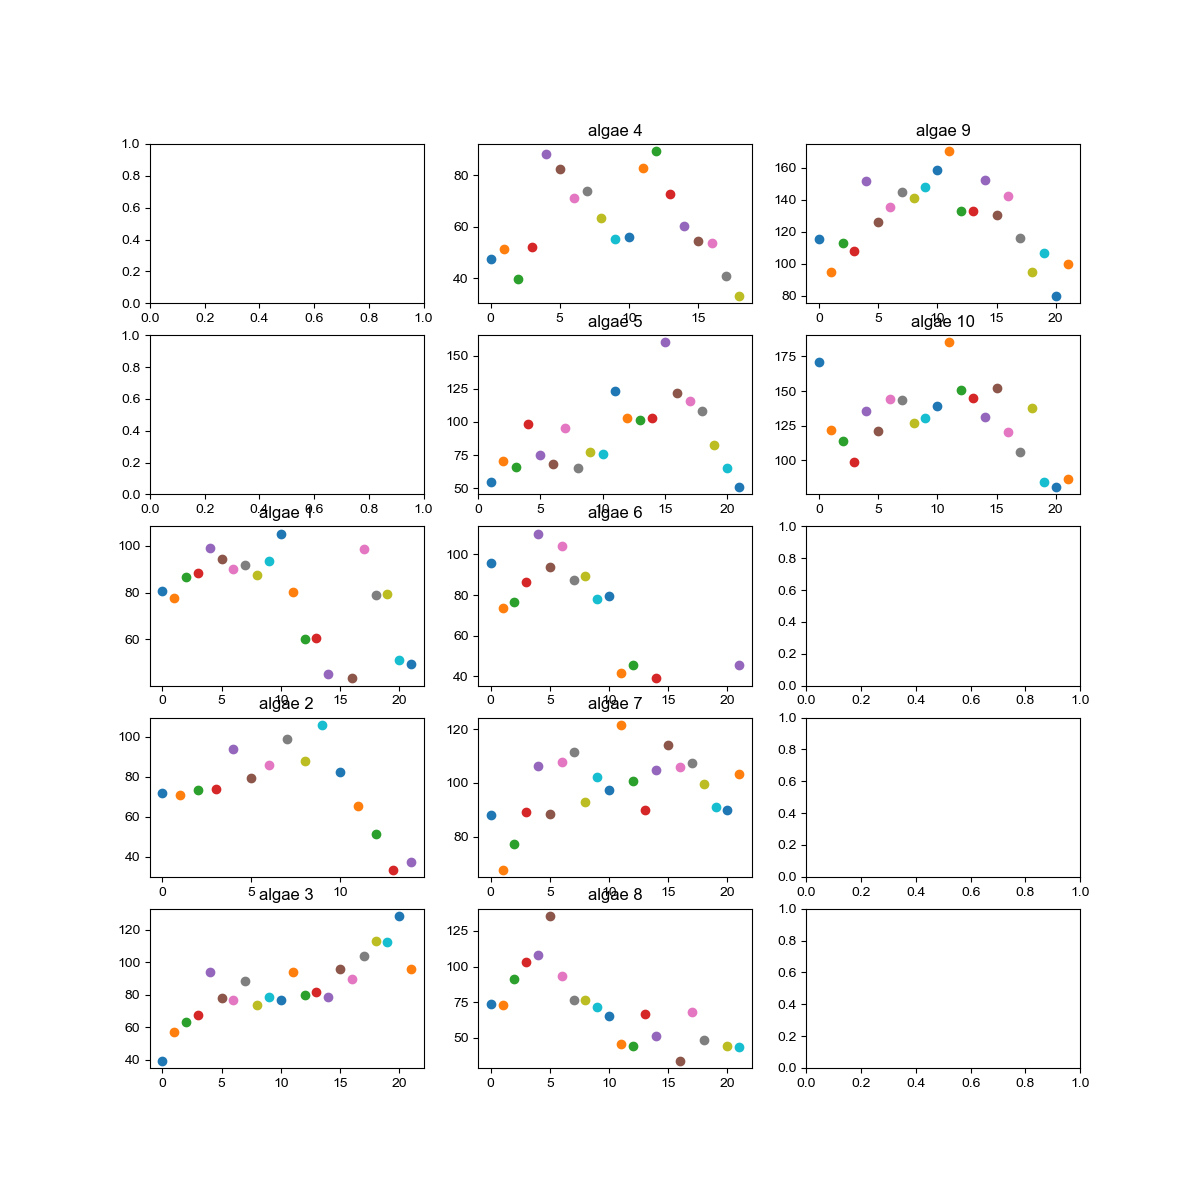

In [69]:
ind_algae = 3
flat_mask = labels.flatten()
start = 191#941#159#191
stop =  941#len(v_high)#190#941

col = 5
fig, axs = plt.subplots(col, 3, figsize=(12,12))

for j in range(1, 11):
    for i, f in enumerate(glob.glob(file_folder + "/*qE_calib*")):
            threshold = 0.08#np.max(v_high)*0.6

            ind_range = list(range(start, stop))
            trace = v_high[ind_range]
            ind = trace > threshold
            nind = trace <= threshold
            nind[0]=0
            nind[-1]=0
            nind = ind

            file_path = f + "/video_timing.npy"
            v_time_high = np.load(file_path)
            if i==i:
                t0 = v_time_high[0]
            v_time_high = v_time_high - t0
            v_time_high = v_time_high%(3600*24)



            print( glob.glob(f))
            file_path = glob.glob(f + "/*video.tiff")[0] # pops up a window to select your file
            video = tiff.imread(file_path)
            video = video[start:stop][nind]
            video = video.reshape(video.shape[0], -1)
            pos = flat_mask == j

            y = np.mean(video[:, pos], axis = 1)    
            x = v_time_high[start:stop][nind]
            params, ypred = get_fit(y, x, give_y = True)
            #plt.plot(x, ypred, label = params[1])
            #plt.plot(x, y, '.')
            #plt.title("zone %d"%(i+3))
            #plt.legend()
            if params[1]<500:
                axs[(j+1)%col][(j+1)//col].scatter(i, params[1])
                axs[(j+1)%col][(j+1)//col].set_title("algae %d"%(j))


In [50]:
video[:,pos]

array([], shape=(711, 0, 588544), dtype=uint8)

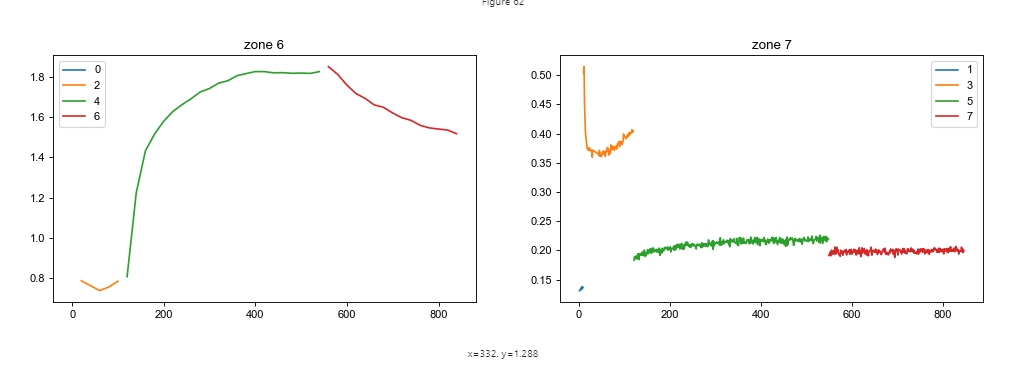

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
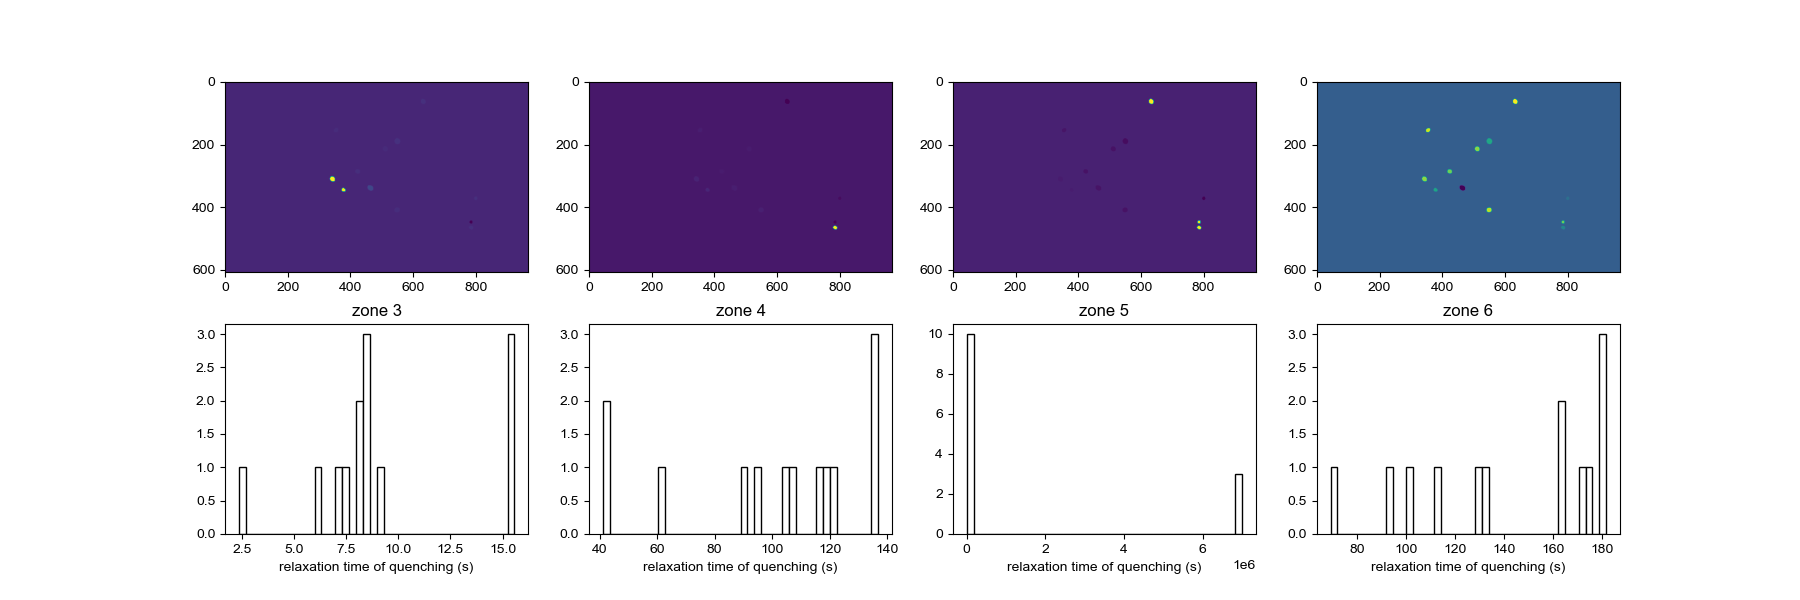

In [76]:
params_tot = []
im_tau = []

fig, axs = plt.subplots(2, 4, figsize = (18, 6))

for  i, z in enumerate([3, 4, 5, 6]):

    S = video_zone[z].shape[0]
    params_high = Parallel(n_jobs = -1 )(delayed(get_fit)(np.mean(video_zone[z].reshape(S, -1)[:,flat_mask==i], axis = 1), time_zone[z]) for i in range(len(algae_list)))
    params_tot.append(np.array(params_high))
    im_tau_high = np.zeros(labels.shape)
    for j in range(len(params_high)):
        im_tau_high[labels==j]=params_high[j][1]

    im_tau.append(im_tau_high)

    params_high = np.array(params_high)
    tau_high = params_high[:,1]
    axs[0][i].imshow(np.log(im_tau_high))
    clipped = clip(tau_high, high =80, low = 1)
    axs[1][i].hist(clipped, 40,  density= False, alpha=1, facecolor = "white", edgecolor = "black")#color = (1,0,0,0.5))
    axs[1][i].set_xlabel("relaxation time of quenching (s)")
    axs[1][i].set_title('zone %d'%z)
    plt.savefig(f + "/dispersion_zone%d.pdf"%z)
            
np.save(f + "/im_ref.npy", imref)
np.save(f + "/im_tau_high.npy", im_tau_high)

IndexError: list index out of range

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
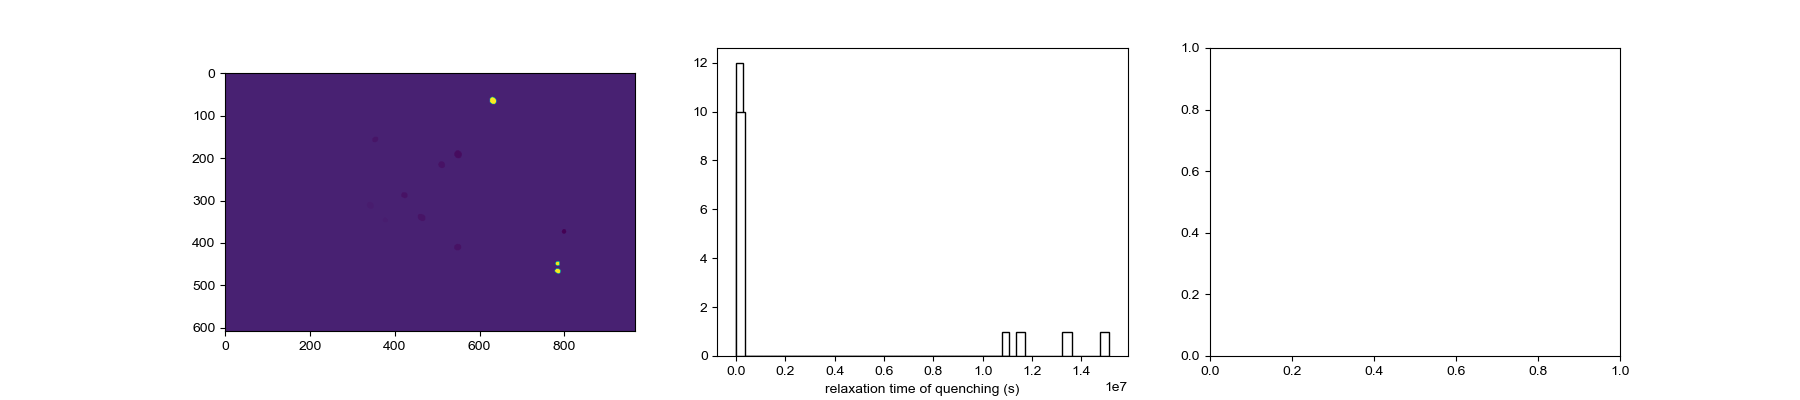

In [77]:
params_tot = []
im_tau = []
for z in range(4,6):
    if z%2==0:
        fig, axs = plt.subplots(1, 3, figsize = (18, 4))

    S = video_zone[z].shape[0]
    params_high = Parallel(n_jobs = -1 )(delayed(get_fit)(np.mean(video_zone[z].reshape(S, -1)[:,flat_mask==i], axis = 1), time_zone[z]) for i in range(len(algae_list)))
    params_tot.append(np.array(params_high))
    im_tau_high = np.zeros(labels.shape)
    for i in range(len(params_high)):
        im_tau_high[labels==i]=params_high[i][1]

    im_tau.append(im_tau_high)

    params_high = np.array(params_high)
    tau_high = params_high[:,1]
    if z==z:# in [3]:
        axs[0].imshow(np.log(im_tau_high))
        clipped = clip(tau_high, high =99, low = 1)
        if z%2==0:
            axs[1].hist(clipped, 40,  density= False, alpha=1, facecolor = "white", edgecolor = "black")#color = (1,0,0,0.5))
        else:
            axs[1].hist(clipped, 40,  density= False, alpha=1, facecolor = "white", edgecolor = "black")#color = (0,0,1,0.5))
            axs[1].set_xlabel("relaxation time of quenching (s)")
            axs[2].scatter(params_tot[z-3][:,1], params_tot[z-2][:,1])
            axs[2].set_xlabel("time(s) pulses")
            axs[2].set_ylabel("time(s) FD")
            axs[2].set_title('zone %d'%z)
            axs[2].set_xlim(clipped.min(), clipped.max())
            axs[2].set_ylim(clipped.min(), clipped.max())
    plt.savefig(f + "/dispersion_zone%d.pdf"%z)
            
np.save(f + "/im_ref.npy", imref)
np.save(f + "/im_tau_high.npy", im_tau_high)

Textarea(value='', description='event:', placeholder='')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
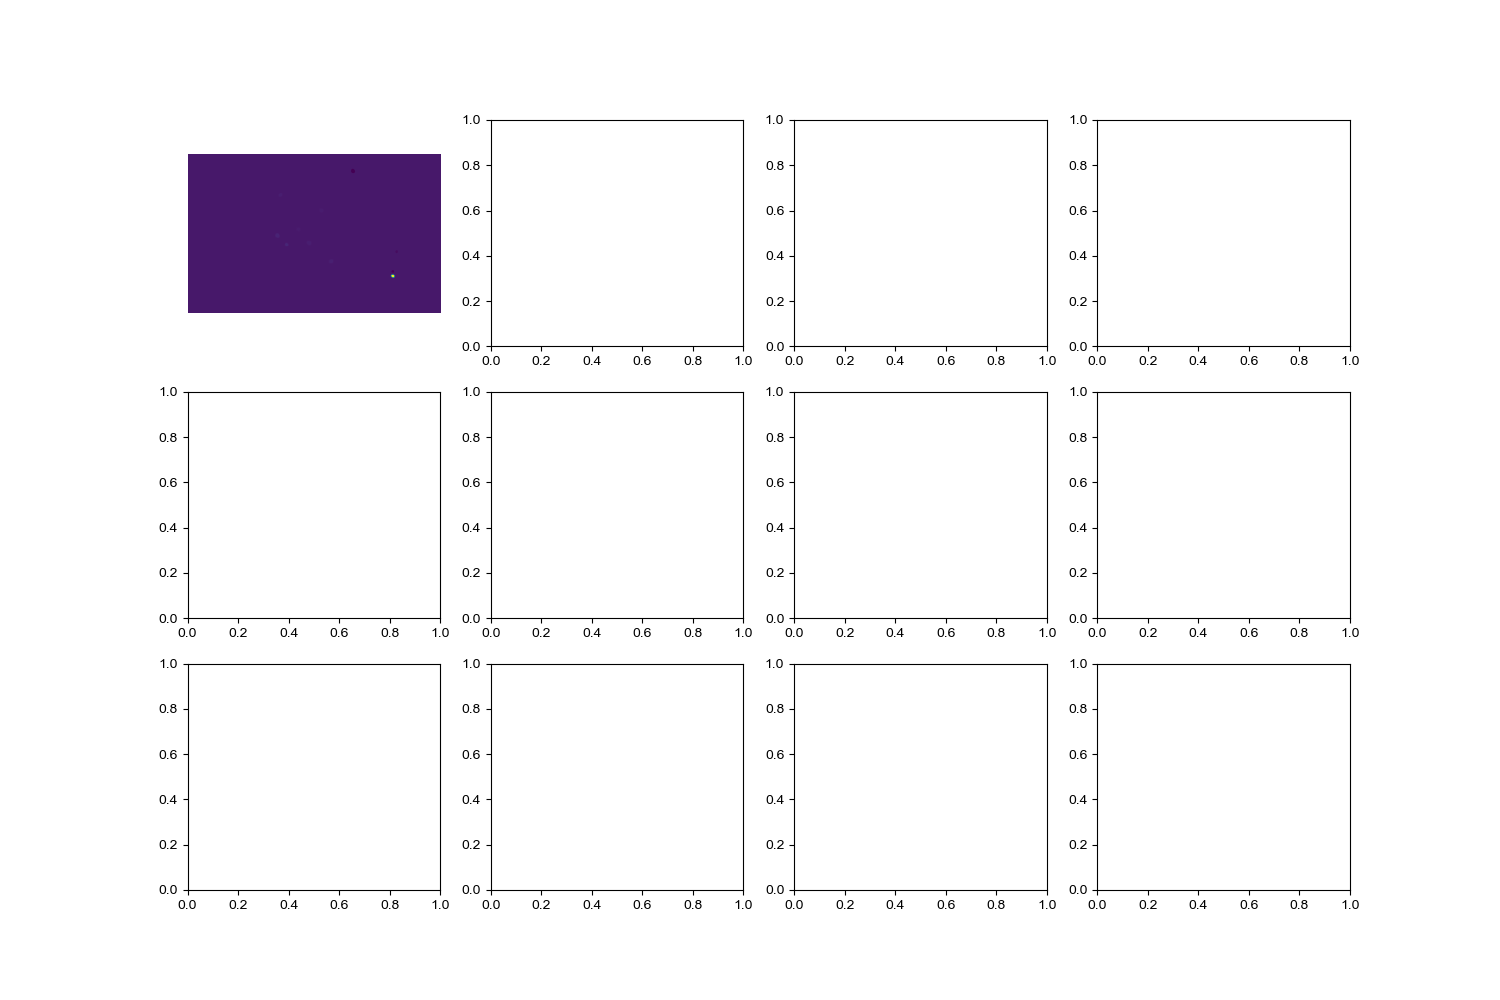

In [80]:
import importlib

importlib.reload(alienlab.widget)
from alienlab.widget import click_to_graph

file_path = f + "/video.tiff"
video_file_high = tiff.imread(file_path)

video_list =  video_zone
time_list =  time_zone
initial_condition_list = [[],[],[],[],[],[],[],[]]
click_to_graph(labels, np.log(im_tau[0]),video_list,time_list, get_fit, clipit=False)

# Compare

In [ ]:
mdirectory = askdirectory()


In [ ]:
list_directory = glob.glob(mdirectory + "/*")
plt.figure()
list_val =  [10, 30, 50, 100, 150, 200, 250, 300, 350, 400,10, 30, 50, 100, 150, 200, 250, 300, 350, 400, 450]
for i in range(len(list_directory)):
    file_folder = list_directory[i]
    file_path = glob.glob(file_folder + "/*_qE_decay.csv")[0] # pops up a window to select your file
    data = pd.read_csv(file_path)
    time_array = np.array(data["time (s) q"])
    time_high = time_array[:-10]
    fluo_high  = np.array(data["voltage (V) q"])
    fluo_high = fluo_high[:-10]
    npq_high =  (fluo_high.max()-fluo_high)/fluo_high
    plt.plot(time_high, npq_high, label = list_val[i])
    file_path = glob.glob(file_folder + "/*SP_before_after.csv")[0] # pops up a window to select your file
    data = np.genfromtxt(file_path)
    fm = data[0][0]- data[0][1]
    fmp = data[1][0]-data[1][1]
    #plt.plot(list_val[i], (fm-fmp)/fmp, 'o')
plt.legend()
plt.show()

In [ ]:
data[0]

In [ ]:
list_directory = glob.glob(mdirectory + "/*")

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

minute = 60
lengths_pulse = [300, 150, 50]
periods_pulse = [0.1*minute, 0.5*minute, 1*minute]
move_plate = True

n = 3
means  = {}
stds = {}
means['high'] = np.zeros((n,n))
stds['high'] =  np.zeros((n,n))
means['pulses'] =  np.zeros((n,n))
stds['pulses'] =  np.zeros((n,n))

i = 0
for k, length in enumerate(lengths_pulse): 
    for l, period in enumerate(periods_pulse):
        file_folder = list_directory[i]
        file_path = glob.glob(file_folder + "/*_ojip_curve.csv")[0] # pops up a window to select your file
        data = pd.read_csv(file_path)
        time_array = np.array(data["time (s) o"])
        time_high = time_array[:-10]
        fluo_high  = np.array(data["voltage (V) o"])
        fluo_high = fluo_high[:-10]
        npq_high =  (fluo_high.max()-fluo_high)/fluo_high

        file_path = glob.glob(file_folder + "/measure_pulse.csv")[0] # pops up a window to select your file
        data= pd.read_csv(file_path)
        fluo_pulses  = np.array(data)
        file_path = glob.glob(file_folder + "/time_pulse.csv")[0] # pops up a window to select your file
        data = pd.read_csv(file_path)
        time_pulses  = np.array(data)
        npq_pulses = (fluo_pulses.max()-fluo_pulses)/fluo_pulses

        axs[0][0].plot(time_high, fluo_high)
        axs[0][0].set_title("MPPC high, voltage")

        axs[0][1].plot(time_pulses, fluo_pulses, '.')
        axs[0][1].set_title("MPPC pulses, voltage")


        im_tau_high = np.load(file_folder + "/im_tau_high.npy")
        im_tau_pulses = np.load(file_folder + "/im_tau_pulses.npy")
        axs[1][0].hist(clip(im_tau_high.flatten(), high = 99, low = 1), range = (0, 30), bins = 25, label = "L: %d ms, dt: %d s"%(length, period))
        axs[1][1].hist(clip(im_tau_pulses.flatten(), high = 99, low = 1), range = (0,180), bins = 25, label =  "L: %d ms, dt: %d s"%(length, period))
        
        high = 97
        low = 3
        means['high'][k][l] = np.mean(clip(im_tau_high, high = high, low = low))
        stds['high'][k][l] = np.std(clip(im_tau_high, high = high, low = low))
        means['pulses'][k][l] = np.mean(clip(im_tau_pulses, high = high, low = low))
        stds['pulses'][k][l] = np.std(clip(im_tau_pulses, high = high, low = low))
        
        plt.legend()
        i += 1

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0][0].imshow(means["pulses"])
axs[0][0].set_title("mean pulses")

axs[1][0].imshow(means["high"])
axs[1][0].set_title("mean high")

axs[0][1].imshow(stds["pulses"])
axs[0][1].set_title("std pulses")

axs[1][1].imshow(stds["high"])
axs[1][1].set_title("std high")

In [ ]:
list_directory = glob.glob(mdirectory + "/*")


minute = 60
lengths_pulse = [300, 150, 50]
periods_pulse = [0.1*minute, 0.5*minute, 1*minute]

D = len(list_directory)//3

fig, axs = plt.subplots(D, 3, figsize=(10, 2*D))

i = 0
for k, length in enumerate(lengths_pulse): 
    for l, period in enumerate(periods_pulse):
        file_folder = list_directory[i]


        im_tau_high = np.load(file_folder + "/im_tau_high.npy")
        axs[i%D][i//D].imshow(im_tau_high, vmin =0 , vmax = 20)
        axs[i%D][i//D].axis("off")
        i += 1
        
    
D = len(list_directory)//3

fig, axs = plt.subplots(D, 3, figsize=(10, 2*D))

i = 0
for k, length in enumerate(lengths_pulse): 
    for l, period in enumerate(periods_pulse):
        file_folder = list_directory[i]


        im_tau_pulses = np.load(file_folder + "/im_tau_pulses.npy")
        axs[i%D][i//D].imshow(im_tau_pulses, vmin =0 , vmax = 130)
        axs[i%D][i//D].axis("off")
        i += 1

In [ ]:
i//2

